In [10]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score,roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from random import randint

%matplotlib inline

In [11]:
df = pd.read_csv('data.csv',index_col=0)
df

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


<AxesSubplot:>

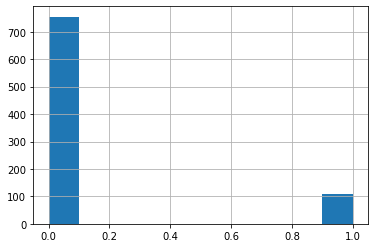

In [12]:
df['result'].hist()

<AxesSubplot:xlabel='gender', ylabel='count'>

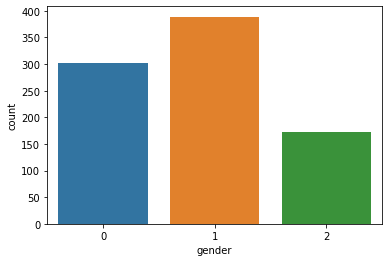

In [13]:
sns.countplot(x=df['gender'])

<AxesSubplot:>

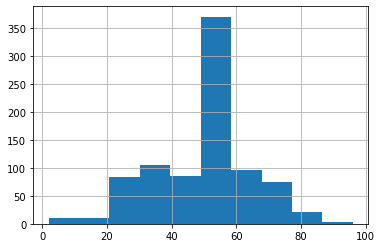

In [14]:
df.age.hist()

In [15]:
print(df.gender.value_counts())

1    389
0    302
2    172
Name: gender, dtype: int64


In [16]:
#df['gender'] = df['gender'].mask(df['gender'] == 2, 1)
#len(df)
for i in range(len(df)):
    df.iloc[i, 2] = randint(0, 1) if df.iloc[i, 2] == 2 else df.iloc[i, 2]
         #df['gender']



In [17]:
df['gender'].value_counts()

1    479
0    384
Name: gender, dtype: int64

In [26]:
x = df[['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
       'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
       'diff_sym_hos']]
y = df['result']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1,shuffle=True, random_state=42)
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(776, 13)
(87, 13)
(776,)
(87,)


In [29]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict = gnb.predict(X_test)
precision, recall = precision_score(y_predict, y_test), recall_score(y_predict, y_test)
roc_auc = roc_auc_score(y_test, y_predict)
F1 = 2 * (precision * recall) / (precision + recall)
print(y_predict)
print(y_test.values)
precision, recall, F1, roc_auc

[1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 1 1 0 0]
[0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0]


(0.9, 0.3103448275862069, 0.4615384615384615, 0.8201298701298702)

In [78]:
y_1 = (y_train == 0).astype(int).sum()
y_0 = len(y_train) - y_1
print(y_0, y_1)
# print(y_train)
gnb = GaussianNB(priors=[y_0 / len(y_train), (y_1 / len(y_train))])
gnb.fit(X_train, y_train)
y_predict = gnb.predict(X_test)
precision, recall = precision_score(y_predict, y_test), recall_score(y_predict, y_test)
roc_auc = roc_auc_score(y_test, y_predict)
F1 = 2 * (precision * recall) / (precision + recall)
print(y_predict)
print(y_test.values)
precision, recall, F1, roc_auc

98 678
[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1
 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 1 1 0 1 1 1 0 0]
[0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0]


(1.0, 0.15384615384615385, 0.2666666666666667, 0.6428571428571428)

scaler = MinMaxScaler()
names = df.columns
result = scaler.fit_transform(df)
print(type(result))
df2 = {}
for i in range(14):
    df2[names[i]] = result[:,i]
print(type(df2))
df2 = pd.DataFrame(df2)
print(type(df2))

df2.head()

In [20]:
#scaler = MinMaxScaler()
#df['age'] = scaler.fit_transform(df['age'].to_numpy()[:,np.newaxis])[:,0]
#df